# Learning about Kalman filter / Examples

Resources

`Kalman Filter from Ground Up`; author Alex Becker; https://www.kalmanfilter.net

**Overview**

an example from chapter 9 of the book

---

In [127]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp

## Motion of a vehicle in 2 dimension / no external forces

**state extrapolation equation**

$\hat{x}_{n+1,n} = \mathbf{F} \cdot \hat{x}_{n,n} + \mathbf{G} \cdot \mathbf{u}_n + \mathbf{w}_n $

In this equation we used the following terms:

| term / property | description | 
|-----------------|-------------|
| $\hat{x}_{n+1,n}$ | predicted / extrapolated state at time step $n+1$ |
| $\hat{x}_{n,n}$ | estimated state at time step $n$ |
| $\mathbf{F}$ |  state transition matrix |
| $\mathbf{G}$  | input transition matrix or control matrix |
| $\mathbf{u}_n$  | control input (deterministic) |
| $\mathbf{w}_n$ | process noise or unmeasurable input (random) |

For the example there shall be not external input. The state extrapolation equation is simplified like this:

$\mathbf{\hat{x}_{n+1,n}} = \mathbf{F} \cdot \mathbf{\hat{x}_{n,n}} $  : (we have not included the process noise )

Since we are dealing with motion in 2D or (x,y) coordinates we have 3 state variables (position, velocity, acceleration) for each coordinate. Thus the state vector comprises 6 components. The true (but hidden) system state $\mathbf{x}_n$ at time step $n$ is expressed by a vector.

$\mathbf{x}_n = \left[x_n,\ \dot{x}_n,\ \ddot{x}_n,\ y_n,\ \dot{y}_n,\ \ddot{y}_n \right]^T$

For the extrapolated state $\hat{x}_{n+1,n}$ we get:

$$
\mathbf{\hat{x}_{n+1,n}} = \left[\begin{array}{c}
\hat{x}_{n+1,n} \\ \hat{\dot{x}}_{n+1,n} \\ \hat{\ddot{x}}_{n+1,n} \\ \hat{y}_{n+1,n} \\ \hat{\dot{y}}_{n+1,n} \\ \hat{\ddot{y}}_{n+1,n}
\end{array}\right] = \left[\begin{array}{c}
\hat{x}_{n,n} + \hat{\dot{x}}_{n,n} \cdot \Delta t + 0.5 \cdot \hat{\ddot{x}}_{n,n} \cdot \Delta t^2 \\
\hat{\dot{x}}_{n,n} + \hat{\ddot{x}}_{n,n} \cdot \Delta t \\
\hat{\ddot{x}}_{n,n} \\
\hat{y}_{n,n} + \hat{\dot{y}}_{n,n} \cdot \Delta t + 0.5 \cdot \hat{\ddot{y}}_{n,n} \cdot \Delta t^2 \\
\hat{\dot{y}}_{n,n} + \hat{\ddot{y}}_{n,n} \cdot \Delta t \\
\hat{\ddot{y}}_{n,n}
\end{array}\right] = \underbrace{\left[\begin{array}{cccccc}
1 & \Delta t & 0.5 \cdot \Delta t^2 & 0 & 0 & 0\\
0 & 1 & \Delta t & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0  \\
0 & 0 & 0 & 1 & \Delta t & 0.5 \cdot \Delta t^2 \\
0 & 0 & 0 & 0 & 1 & \Delta t \\
0 & 0 & 0 & 0 & 0 & 1 \\
\end{array}\right]}_{\mathbf{F}} \cdot \underbrace{\left[\begin{array}{c}
\hat{x}_{n,n} \\ \hat{\dot{x}}_{n,n} \\ \hat{\ddot{x}}_{n,n} \\ \hat{y}_{n,n} \\ \hat{\dot{y}}_{n,n} \\ \hat{\ddot{y}}_{n,n}
\end{array}\right]}_{\mathbf{\hat{x}_{n,n}} }
$$

So we have found the state transition matrix :

$$
\mathbf{F} = \left[\begin{array}{cccccc}
1 & \Delta t & 0.5 \cdot \Delta t^2 & 0 & 0 & 0\\
0 & 1 & \Delta t & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0  \\
0 & 0 & 0 & 1 & \Delta t & 0.5 \cdot \Delta t^2 \\
0 & 0 & 0 & 0 & 1 & \Delta t \\
0 & 0 & 0 & 0 & 0 & 1 \\
\end{array}\right]
$$

## Covariance Extrapolation Equation

$$
\mathbf{P}_{n+1,n} = \mathbf{F} \cdot \mathbf{P}_{n,n} \cdot \mathbf{F}^T + \mathbf{Q}
$$

In this example the general form of the estimate covariance matrix shown here:

$$
\mathbf{P} = \left[\begin{array}{cccccc}
p_{x,x} & p_{x,\dot{x}} & p_{x,\ddot{x}} & p_{x,y} & p_{x,\dot{y}} & p_{x,\ddot{y}} \\
p_{\dot{x},x} & p_{\dot{x},\dot{x}} & p_{\dot{x},\ddot{x}} & p_{\dot{x},y} & p_{\dot{x},\dot{y}} & p_{\dot{x},\ddot{y}} \\
p_{\ddot{x},x} & p_{\ddot{x},\dot{x}} & p_{\ddot{x},\ddot{x}} & p_{\ddot{x},y} & p_{\ddot{x},\dot{y}} & p_{\ddot{x},\ddot{y}} \\
p_{y,x} & p_{y,\dot{x}} & p_{y,\ddot{x}} & p_{y,y} & p_{y,\dot{y}} & p_{y,\ddot{y}} \\
p_{\dot{y},x} & p_{\dot{y},\dot{x}} & p_{\dot{y},\ddot{x}} & p_{\dot{y},y} & p_{\dot{y},\dot{y}} & p_{\dot{y},\ddot{y}} \\
p_{\ddot{y},x} & p_{\ddot{y},\dot{x}} & p_{\ddot{y},\ddot{x}} & p_{\ddot{y},y} & p_{\ddot{y},\dot{y}} & p_{\ddot{y},\ddot{y}} \\
\end{array}\right]
$$

The main diagonal elements are the variances of position, velocity, acceleration for the $x,y$ coordinates. The off-diagonal elements are the covariances.

For the example at hand we assume that properties relating to $x$ and $y$ coordinates are not correlated. This leads to the following structure of the covariance matrix.

$$
\mathbf{P} = \left[\begin{array}{cccccc}
p_{x,x} & p_{x,\dot{x}} & p_{x,\ddot{x}} & 0 & 0 & 0 \\
p_{\dot{x},x} & p_{\dot{x},\dot{x}} & p_{\dot{x},\ddot{x}} & 0 & 0 & 0 \\
p_{\ddot{x},x} & p_{\ddot{x},\dot{x}} & p_{\ddot{x},\ddot{x}} & 0 & 0 & 0 \\
0 & 0 & 0 & p_{y,\dot{y}} & p_{y,\dot{y}} & p_{y,\ddot{y}} \\
0 & 0 & 0 & p_{\dot{y},y} & p_{\dot{y},\dot{y}} & p_{\dot{y},\ddot{y}} \\
0 & 0 & 0 & p_{\ddot{y},y} & p_{\ddot{y},\dot{y}} & p_{\ddot{y},\ddot{y}} \\
\end{array}\right]
$$

---


## Process noise / 2 dimensional case


It is assumed that in this example process noise only affects the acceleration in x and y direction. The noise vector $\mathbf{w}_n $ is then:
 
$$
\mathbf{w}_n = \left[\begin{array}{c}
0 \\ 0 \\ w_x \\ 0 \\ 0 \\ w_y
\end{array}\right]
$$

with $w_x$ and $w_y$ being zero mean random variables. For the covariance matrix we obtain:

$$
Cov\left(\mathbf{w}_n \cdot \mathbf{w}_n^T \right) = \mathbf{Q}_w = \left[\begin{array}{cccccc}
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & Var(w_x) & 0 & 0 & Cov(w_x, w_y) \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & Cov(w_x, w_y) & 0 & 0 & Var(w_y 
\end{array}\right]
$$

Assuming independence of $w_x$ and $w_y$ and identical variances for $w_x$ and $w_y$ we set $Var(w_x) = Var(w_y) = \sigma_w^2$ and $Cov(w_x, w_y) = 0$ :

$$
Cov\left(\mathbf{w}_n \cdot \mathbf{w}_n^T \right) = \mathbf{Q}_w = \left[\begin{array}{cccccc}
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 
\end{array}\right] \cdot \sigma_w^2
$$


For a two dimensional constant motion model the state transition matrix $\mathbf{F}$ has already been found to be:

$$
\mathbf{F} = \left[\begin{array}{cccccc}
1 & \Delta t & 0.5 \cdot \Delta t^2 & 0 & 0 & 0 \\
0 & 1 & \Delta t & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & \Delta t & 0.5 \cdot \Delta t^2 \\
0 & 0 & 0 & 0 & 1 & \Delta t \\
0 & 0 & 0 & 0 & 0 & 1 
\end{array}\right]
$$

Now we need to compute the covariance of process noise transformed via the state transition matrix:

$$
\mathbf{Q} = \mathbf{F} \cdot \mathbf{Q}_w \cdot \mathbf{F}^T 
$$

This computation is done in two steps:

**step#1**

$$
\mathbf{F} \cdot \mathbf{Q}_w = \left[\begin{array}{cccccc}
1 & \Delta t & 0.5 \cdot \Delta t^2 & 0 & 0 & 0 \\
0 & 1 & \Delta t & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & \Delta t & 0.5 \cdot \Delta t^2 \\
0 & 0 & 0 & 0 & 1 & \Delta t \\
0 & 0 & 0 & 0 & 0 & 1 
\end{array}\right] \cdot \left[\begin{array}{cccccc}
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 
\end{array}\right] \cdot \sigma_w^2 = \left[\begin{array}{cccccc}
0 & 0 & 0.5 \cdot \Delta t^2 & 0 & 0 & 0 \\
0 & 0 & \Delta t & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0.5 \cdot \Delta t^2 \\
0 & 0 & 0 & 0 & 0 & \Delta t \\
0 & 0 & 0 & 0 & 0 & 1 \\
\end{array}\right] \cdot \sigma_w^2 
$$


**step#2**

$$
\mathbf{F} \cdot \mathbf{Q}_w \cdot \mathbf{F}^T = \left[\begin{array}{cccccc}
0 & 0 & 0.5 \cdot \Delta t^2 & 0 & 0 & 0 \\
0 & 0 & \Delta t & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0.5 \cdot \Delta t^2 \\
0 & 0 & 0 & 0 & 0 & \Delta t \\
0 & 0 & 0 & 0 & 0 & 1 \\
\end{array}\right]  \cdot \left[\begin{array}{cccccc}
1 & 0 & 0 & 0 & 0 & 0 \\
\Delta t & 1 & 0 & 0 & 0 & 0 \\
0.5 \cdot \Delta t^2 & \Delta t & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & \Delta t & 1 & 0\\
0 & 0 & 0 & 0.5 \cdot \Delta t^2 & \Delta t & 1 
\end{array}\right] \cdot \sigma_w^2 
$$

$$
\mathbf{Q} = \mathbf{F} \cdot \mathbf{Q}_w \cdot \mathbf{F}^T = \left[\begin{array}{cccccc}
0.25 \cdot \Delta t^4 & 0.5 \cdot \Delta t^3 & 0.5 \cdot \Delta t^2 & 0 & 0 & 0 \\
0.5 \cdot \Delta t^3 & \Delta t^2 & \Delta t & 0 & 0 & 0 \\
0.5 \cdot \Delta t^2 & \Delta t & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0.25 \cdot \Delta t^4 &  0.5 \cdot \Delta t^3 &  0.5 \cdot \Delta t^2 \\
0 & 0 & 0 & 0.5 \cdot \Delta t^3 & \Delta t^2 & \Delta t \\
0 & 0 & 0 & 0.5 \cdot \Delta t^2 & \Delta t & 1 
\end{array}\right] \cdot \sigma_w^2 
$$

---

## Measurement

In this example measurements provide the $x_n,\ y_n$ positions for time intervals $n \cdot \Delta t$.

The general equation for measurements is:

$$
\mathbf{z}_n = \mathbf{H} \cdot \mathbf{x}_n + \mathbf{r}_n
$$

In our specific case the measurement vector is:

$$
\mathbf{z}_n = \left[\begin{array}{c}
x_{n,\ measured} \\
y_{n,\ measured}
\end{array}\right] = \underbrace{\left[\begin{array}{cccccc}
1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0
\end{array}\right]}_{\mathbf{H}} \cdot \underbrace{\left[\begin{array}{c}
x_n \\ \dot{x}_n \\ \ddot{x}_n \\ y_n \\ \dot{y}_n \\ \ddot{y}_n
\end{array}\right]}_{\mathbf{x}_n} +  \underbrace{\left[\begin{array}{c}
r_{n;x} \\ r_{n;y}
\end{array}\right]}_{\mathbf{r}_n}
$$

The measurement noise is modelled by two zero mean random variables $r_{n;x}$ and $r_{n;y}$. The corresponding covariance matrix $\mathbf{R}_n$ is:

$$
\mathbf{R}_n = E\left( \mathbf{r}_n \cdot \mathbf{r}_n^T \right) = \left[\begin{array}{cc}
Var(r_{n;x}) &  Cov(r_{n;x}, r_{n;y})\\
Cov(r_{n;x}, r_{n;y}) & Var(r_{n;y})
\end{array}\right]
$$

Assumption: the measurement error for x position and y position are independent. The covariance is 0.

Assumption: the measurement uncertainty (variance) is the same for x and y position. For the covariance matrix $\mathbf{R}_n$ of the measurement error we obtain:

$$
\mathbf{R}_n = \left[\begin{array}{cc}
\sigma_m^2 &  0\\
0 & \sigma_m^2
\end{array}\right]
$$

Furthermore we shall assume a non-time varying variance of the measurement error. We may then drop the $n$ subscript of the covariance matrix.

$$
\mathbf{R} = \left[\begin{array}{cc}
\sigma_m^2 &  0\\
0 & \sigma_m^2
\end{array}\right] \ ; \ for \ all \ n
$$

**initial conditions**

The initial state $\mathbf{\hat{x}_{0,0}}$ :

$$
\mathbf{\hat{x}_{0,0}} = \left[\begin{array}{c}
\hat{x}_{0,0} \\ \hat{\dot{x}}_{0,0} \\ \hat{\ddot{x}}_{0,0} \\ \hat{y}_{0,0} \\ \hat{\dot{y}}_{0,0} \\ \hat{\ddot{y}}_{0,0} 
\end{array}\right]
$$

The choice of the components of this vector depends on our prior knowledge. We will consider two cases:

1) an arbitrary initial state vector is chosen

2) the initial state vector uses the first measured position. Since measurements are only available for positions, we must still choose initial values for the velocities $\hat{\dot{x}}_{0,0} , \ \hat{\dot{y}}_{0,0}$ and accelerations $\hat{\ddot{x}}_{0,0} , \ \hat{\ddot{y}}_{0,0}$. We will use  $0$ for these initial values.

The initial covariance matrix of the estimated initial state shall be chosen as a diagonal matrix. For the elements in the main diagonal fairly large values are chosen. This reflects the fact that assumptions for the initial state vector are very unreliable.

$$
\mathbf{P}_{0,0} = \left[\begin{array}{cccccc}
\sigma_{x}^2 & 0 & 0 & 0 & 0 & 0 \\
0 & \sigma_{\dot{x}}^2 & 0 & 0 & 0 & 0 \\
0 & 0 & \sigma_{\ddot{x}}^2 & 0 & 0 & 0  \\
0 & 0 & 0 & \sigma_{y}^2 & 0 & 0 \\
0 & 0 & 0 & 0 & \sigma_{\dot{y}}^2 & 0 \\
0 & 0 & 0 & 0 & 0 & \sigma_{\ddot{y}}^2 \\
\end{array}\right]
$$

**demonstration**

In the following a numerical demonstration for the initaliation step and the 1st iteration is provided.

The numerical result are reasonably similar to those presented in chapter 9 / example 9 of `Kalman Filter from Ground Up`; author Alex Becker; https://www.kalmanfilter.net


---

In [128]:
# measured positions

xm = np.array([301.5, 298.23, 297.83, 300.42, 301.94, 299.5, 305.98, 301.25, 299.73, 299.2, 298.62, 301.84, 299.6, 295.3,
      299.3, 301.95, 296.3, 295.11, 295.12, 289.9, 283.51, 276.42, 264.22, 250.25, 236.66, 217.47, 199.75, 179.7, 160, 140.92, 113.53,
     93.68, 69.71, 45.93, 20.87])

ym = np.array([-401.46, -375.44, -346.15, -320.2, -300.08, -274.12, -253.45, -226.4, -200.65, -171.62, -152.11, -125.19, -93.4, -74.79, -49.12,
     -28.73, 2.99, 25.65, 49.86, 72.87, 96.34, 120.4, 144.69, 168.06, 184.99, 205.11, 221.82, 238.3, 253.02, 267.19, 270.71,
     285.86, 288.48, 292.9, 298.77])

zm = np.vstack( (xm, ym) )

# time between successive measurements
dt = 1.0

# random acceleration standard deviation [m/s^2]
sigma_a = 0.2

# measurment standard deviation [m]
sigma_m = 3.0

# state transition matrix F
F_mat = np.array( [[1.0, dt, 0.5*dt**2, 0, 0, 0], 
                  [0, 1, dt, 0, 0, 0],
                  [0, 0, 1, 0, 0, 0],
                  [0, 0, 0, 1.0, dt, 0.5*dt**2],
                  [0, 0, 0, 0, 1.0, dt],
                  [0, 0, 0, 0, 0, 1]
                  ])

# process noise matrix Q
Q_mat = (sigma_a**2) * np.array([
    [0.25*dt**4, 0.5*dt**3, 0.5*dt**2, 0, 0, 0],
    [0.5*dt**3, dt**2, dt, 0, 0, 0],
    [0.5*dt**2, dt, 1.0, 0, 0, 0],
    [0, 0, 0, 0.25*dt**4, 0.5*dt**3, 0.5*dt**2],
    [0, 0, 0, 0.5*dt**3, dt**2, dt],
    [0, 0, 0, 0.5*dt**2, dt, 1.0]
])

# measurement covariance matrix R
R_mat = np.array([
    [sigma_m**2, 0],
    [0, sigma_m**2]
])

# measurement matrix
H_mat = np.array([
    [1, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0]
])


In [129]:
# initial state vector (all elements set to 0)

x_est_0 = np.array([0, 0, 0, 0, 0, 0])
P_est_0 = np.diag([500]*6)

In [130]:
print(f"x_est_0  :\n{x_est_0}\n")
print(f"P_est_0  :\n{P_est_0}")

x_est_0  :
[0 0 0 0 0 0]

P_est_0  :
[[500   0   0   0   0   0]
 [  0 500   0   0   0   0]
 [  0   0 500   0   0   0]
 [  0   0   0 500   0   0]
 [  0   0   0   0 500   0]
 [  0   0   0   0   0 500]]


In [131]:
x_pre_1 = F_mat @ x_est_0
print(f"x_pre_1 :\n{x_pre_1}")

x_pre_1 :
[0. 0. 0. 0. 0. 0.]


In [132]:
P_pre_1 = F_mat @ P_est_0 @ F_mat.T + Q_mat
print(f"P_pre_1 :\n{P_pre_1}")

P_pre_1 :
[[1125.01  750.02  250.02    0.      0.      0.  ]
 [ 750.02 1000.04  500.04    0.      0.      0.  ]
 [ 250.02  500.04  500.04    0.      0.      0.  ]
 [   0.      0.      0.   1125.01  750.02  250.02]
 [   0.      0.      0.    750.02 1000.04  500.04]
 [   0.      0.      0.    250.02  500.04  500.04]]


In [133]:
# first measurement
z1 = zm[:, 0]
print(f"z1 :\n{z1}")

z1 :
[ 301.5  -401.46]


In [134]:
# Kalman gain
A_mat = P_pre_1 @ H_mat.T
Inv_mat = np.linalg.inv(H_mat @ A_mat + R_mat)
K_gain = A_mat @ Inv_mat

print(f"K_gain:\n{K_gain}")

K_gain:
[[0.99206356 0.        ]
 [0.66138747 0.        ]
 [0.22047425 0.        ]
 [0.         0.99206356]
 [0.         0.66138747]
 [0.         0.22047425]]


In [135]:
x_est_1 = x_pre_1 + K_gain @ (z1 - H_mat @ x_pre_1)
print(f"x_est_1 :\n{x_est_1}")

x_est_1 :
[ 299.10716396  199.40832091   66.47298525 -398.27383762 -265.52061199
  -88.5115909 ]


In [136]:
B_mat = np.eye(6) - K_gain @ H_mat
P_est_1 = B_mat @ P_pre_1 @ B_mat.T + K_gain @ R_mat @ K_gain.T
print(f"P_est_1 :\n{P_est_1}")

P_est_1 :
[[  8.92857206   5.95248719   1.98426822   0.           0.
    0.        ]
 [  5.95248719 503.98617296 334.67990582   0.           0.
    0.        ]
 [  1.98426822 334.67990582 444.91702895   0.           0.
    0.        ]
 [  0.           0.           0.           8.92857206   5.95248719
    1.98426822]
 [  0.           0.           0.           5.95248719 503.98617296
  334.67990582]
 [  0.           0.           0.           1.98426822 334.67990582
  444.91702895]]


In the following section, the tracking response of the Kalman filter is evaluated for all 35 measured positions. 

The positions are displayed and compared with the measurement. Additionally the velocity in x- and y-direction are displayed.

---

In [137]:
# number of measurements
N = zm.shape[1]
x_est_0 = np.array([0, 0, 0, 0, 0, 0])
P_est_0 = np.eye(6) * 500

x_est_vec = []
x_pre_vec = []

for k in range(N):
    
    if k == 0:
        x_est = x_est_0
        P_est = P_est_0
    # predictions of state vector and covariance matrix
    x_pre = F_mat @ x_est
    P_pre = F_mat @ P_est @ F_mat.T + Q_mat

    # Kalman gain
    A_mat = P_pre @ H_mat.T
    Inv_mat = np.linalg.inv(H_mat @ A_mat + R_mat)
    K_gain = A_mat @ Inv_mat
    # store
    x_est_vec.append(x_est)
    x_pre_vec.append(x_pre)

    z = zm[:,k]
    x_est = x_pre + K_gain @ (z - H_mat @ x_pre)
    B_mat = np.eye(6) - K_gain @ H_mat
    P_est = B_mat @ P_pre @ B_mat.T + K_gain @ R_mat @ K_gain.T

x_est_vec = np.array(x_est_vec)
x_pre_vec = np.array(x_pre_vec)

In [138]:
x_positions = x_est_vec[:,0]
y_positions = x_est_vec[:,3]
x_velocity = x_est_vec[:,1]
y_velocity = x_est_vec[:,4]

In [141]:
# the Kalman gain after N=35 iterations (similar values are found in the book)
print(f"K_gain :\n{K_gain}")

K_gain :
[[0.55555654 0.        ]
 [0.2222232  0.        ]
 [0.04444464 0.        ]
 [0.         0.55555654]
 [0.         0.2222232 ]
 [0.         0.04444464]]


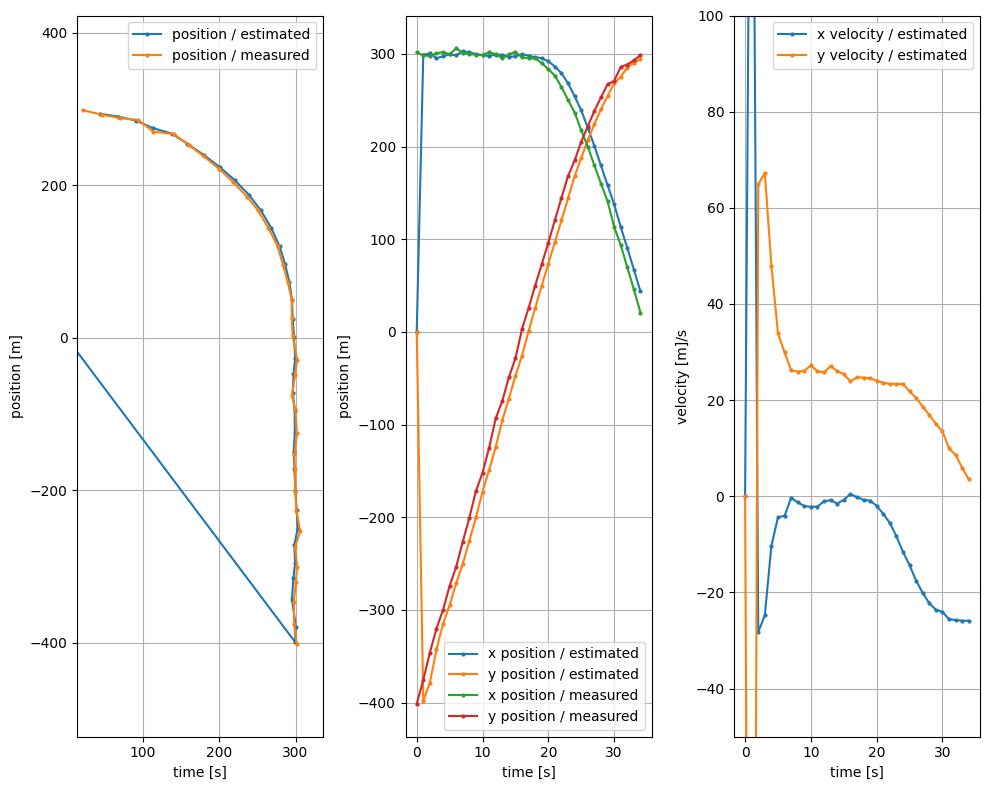

In [140]:
fig1, ax1 = plt.subplots(nrows=1, ncols=3, figsize=(10,8))
fig1.set_tight_layout(True)

ax1[0].axis('equal')
ax1[0].plot(x_positions, y_positions, linestyle='-', marker='o', markersize=2, label='position / estimated')
ax1[0].plot(zm[0, :], zm[1, :], linestyle='-', marker='o', markersize=2, label='position / measured')
ax1[0].set_xlabel('time [s]')
ax1[0].set_ylabel('position [m]')
ax1[0].set_title('')
ax1[0].legend()
ax1[0].set(xlim=(0,350), ylim=(-450, 350))
ax1[0].grid(True) 

ax1[1].plot(np.arange(N), x_positions, linestyle='-', marker='o', markersize=2, label='x position / estimated')
ax1[1].plot(np.arange(N), y_positions, linestyle='-', marker='o', markersize=2, label='y position / estimated')
ax1[1].plot(np.arange(N), zm[0,:], linestyle='-', marker='o', markersize=2, label='x position / measured')
ax1[1].plot(np.arange(N), zm[1,:], linestyle='-', marker='o', markersize=2, label='y position / measured')
ax1[1].set_xlabel('time [s]')
ax1[1].set_ylabel('position [m]')
ax1[1].set_title('')
ax1[1].legend()
ax1[1].grid(True) 

ax1[2].plot(np.arange(N), x_velocity, linestyle='-', marker='o', markersize=2, label='x velocity / estimated')
ax1[2].plot(np.arange(N), y_velocity, linestyle='-', marker='o', markersize=2, label='y velocity / estimated')
ax1[2].set_xlabel('time [s]')
ax1[2].set_ylabel('velocity [m]/s')
ax1[2].set_title('')
ax1[2].set_ylim((-50, 100))
ax1[2].legend()
ax1[2].grid(True) 

**Comments**

The computation of the `Kalman gain` involves the **inverse** of a matrix. In our case the inverse matrix has been directly computed for each iteration. 

The direct computation of the inverse may result in **numerical issues** however. There should be procedure to compute the inverse matrix recursively. 